In [ ]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 17:33:20--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2024-01-28 17:33:20 (31.7 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
file_path = 'input.txt'

with open(file_path, 'r') as file:
    text_content = file.read()

text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

tokens = word_tokenize(cleaned_text)

tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
text_tokens = [token.strip() for token in tokens if token not in english_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.wv['king']

array([ 3.0993388e-04,  2.4344164e-03, -1.4234134e-03,  3.3902135e-04,
       -5.0136447e-04, -1.6091732e-02,  3.2627941e-03,  2.2791972e-02,
       -1.1042583e-02, -1.7762078e-02, -3.6597378e-03, -1.5405690e-03,
       -9.7852349e-03,  1.2478584e-02,  2.5990354e-03, -7.2583784e-03,
       -4.4826027e-03, -1.3544309e-02,  2.0077960e-03,  3.9538628e-04,
       -1.4317234e-03, -5.3780270e-04,  4.8290375e-03, -1.4868095e-04,
        5.2706026e-03, -3.7946037e-03, -1.5596629e-04, -1.3292088e-02,
       -6.4670295e-03,  1.0294678e-02,  7.8338804e-03, -1.2208835e-02,
        2.7726702e-03, -1.1601759e-02, -5.0268029e-03,  1.0403274e-02,
       -9.2993993e-03,  3.2981781e-03,  7.1992739e-03, -1.4952275e-02,
       -8.3959708e-03, -8.6815543e-03, -1.3961735e-03,  1.2780608e-03,
        9.4627552e-03, -3.8420085e-03, -6.9499738e-03,  1.9297763e-03,
       -2.6639791e-03,  2.8018560e-04,  1.7777625e-03, -5.7056342e-05,
       -4.2708353e-03, -5.7700970e-03,  1.5772636e-03, -8.5923343e-04,
      

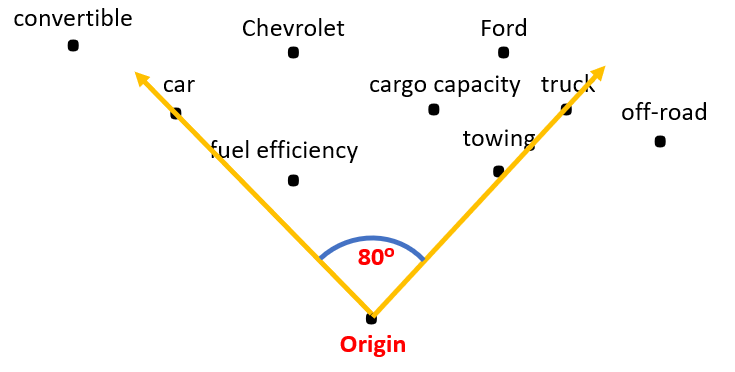

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [ ]:
model.wv.most_similar(["king"])

[('seen', 0.6131981015205383),
 ('youth', 0.6103989481925964),
 ('since', 0.6095167994499207),
 ('oer', 0.6086562871932983),
 ('merit', 0.6057994961738586),
 ('call', 0.6040176153182983),
 ('fathers', 0.599946141242981),
 ('best', 0.5997427701950073),
 ('custom', 0.5994468331336975),
 ('devise', 0.5908424258232117)]

In [ ]:
model.wv.similarity('king', 'queen')

-0.029355673

In [ ]:
model.wv.similarity('king', 'prince')

0.027135193

In [ ]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors)
  plt.figure(figsize=(12,10))
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

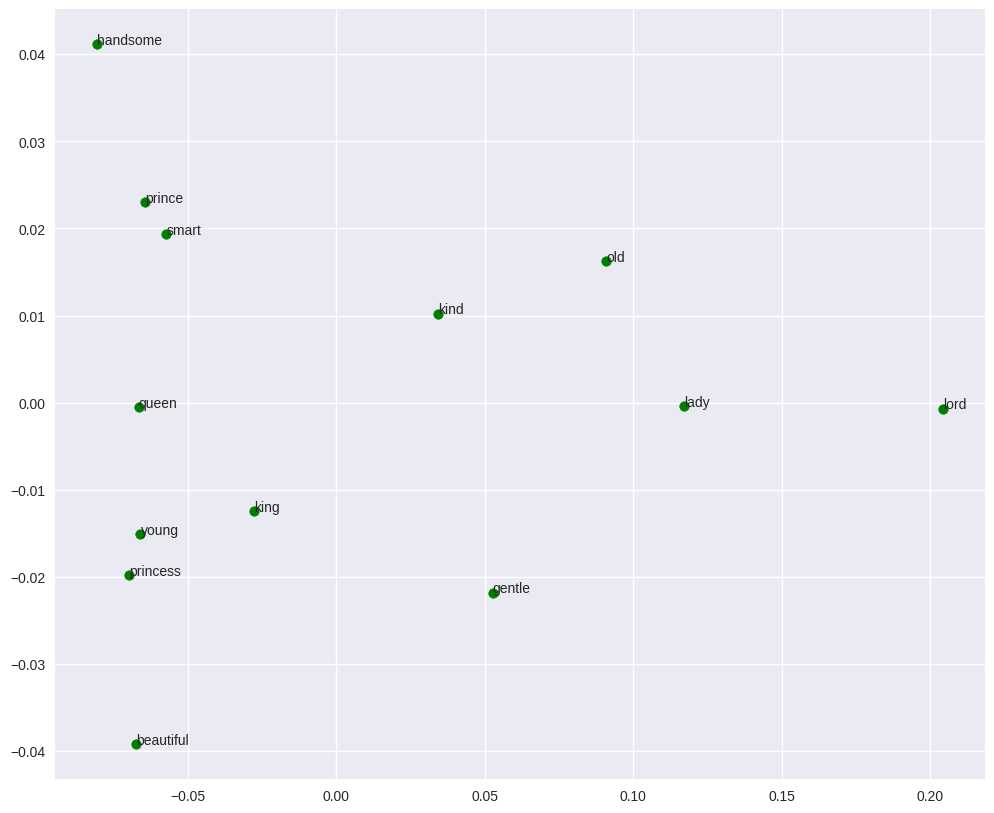

In [ ]:
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])